In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import seaborn as sns
%matplotlib inline 


In [370]:
data = pd.read_csv("train.csv")

In [371]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [372]:
data.head() ## .tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [373]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


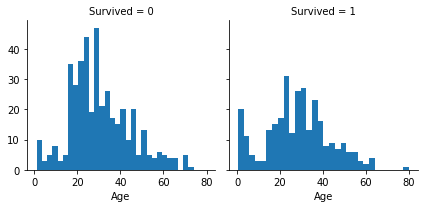

In [374]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=30)


## NA

In [375]:
data.isna().sum()  # .any()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [364]:
#data.dropna(axis=0, subset=["Embarked", "Age"], inplace = True)

In [365]:
data[['Sex','Survived', 'Age']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived,Age
0,female,0.742038,27.915709
1,male,0.188908,30.726645


In [376]:
def dropColumns(data):
    data.drop('Cabin', axis=1,inplace = True)
    data.drop('PassengerId', axis=1, inplace=True)
    data.drop('Name', axis=1, inplace=True)
    data.drop("Ticket", axis = 1, inplace=True)
    data1 = data['Age'] = data['Age'].fillna(data['Age'].median())
    return data1

In [377]:
dropColumns(data)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      28.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     28.0
18     31.0
19     28.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     28.0
27     19.0
28     28.0
29     28.0
       ... 
861    21.0
862    48.0
863    28.0
864    24.0
865    42.0
866    27.0
867    31.0
868    28.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    28.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [378]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [379]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [380]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [279]:
def make_dummies(data):
    dum_sex = pd.get_dummies(data['Sex'])
    dum_embarked = pd.get_dummies(data["Embarked"])
    data.drop("Sex", axis =1,inplace=True)
    data.drop("Embarked", axis =1,inplace=True)
    df = data.join([dum_sex, dum_embarked])
    return df

In [280]:
df = make_dummies(data)

In [281]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


## Test Data

In [381]:
df_test = pd.read_csv("test.csv")

In [382]:
dropColumns(df_test)

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
5      14.0
6      30.0
7      26.0
8      18.0
9      21.0
10     27.0
11     46.0
12     23.0
13     63.0
14     47.0
15     24.0
16     35.0
17     21.0
18     27.0
19     45.0
20     55.0
21      9.0
22     27.0
23     21.0
24     48.0
25     50.0
26     22.0
27     22.5
28     41.0
29     27.0
       ... 
388    21.0
389     6.0
390    23.0
391    51.0
392    13.0
393    47.0
394    29.0
395    18.0
396    24.0
397    48.0
398    22.0
399    31.0
400    30.0
401    38.0
402    22.0
403    17.0
404    43.0
405    20.0
406    23.0
407    50.0
408    27.0
409     3.0
410    27.0
411    37.0
412    28.0
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

In [383]:
test = make_dummies(df_test)

In [384]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [390]:
test.isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      1
female    0
male      0
C         0
Q         0
S         0
dtype: int64

In [391]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [392]:
test.isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
female    0
male      0
C         0
Q         0
S         0
dtype: int64

## Classification Model


In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [283]:
logit = LogisticRegression()

In [284]:
y = df["Survived"]
x = df.drop("Survived", axis = 1)

In [322]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [317]:
logit.fit(x_train,y_train)
logit.predict(x_test)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [318]:
score = logit.score(x_test, y_test)
print(score)


0.7988826815642458


## Randon Forest and GradientBoosting

In [299]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [319]:
rfc = RandomForestClassifier(n_estimators=100)
rfc = clf.fit(x, y)
scores = cross_val_score(clf, x, y, cv=5)
scores.mean()



0.8238510213714724

In [323]:
clf = GradientBoostingClassifier(random_state=0)

In [324]:
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8475336322869955

## Model on Test_data

In [394]:
test["Survived"] = clf.predict(test)

In [397]:
test.drop(["Pclass","Age","SibSp","Parch","Fare","female","male","C","Q","S"], axis = 1, inplace = True)

In [423]:
test_data = pd.read_csv("test.csv")

In [425]:
test["PassengerId"]= test_data["PassengerId"]

In [432]:
cols = test.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols

['PassengerId', 'Survived']

In [437]:
testResult = test[cols]

In [439]:
testResult.to_csv('result.csv', index=False)